In [3]:
!pip install pandas numpy scikit-learn matplotlib seaborn


Dataset shape: (545, 13)
Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
Using target column: price


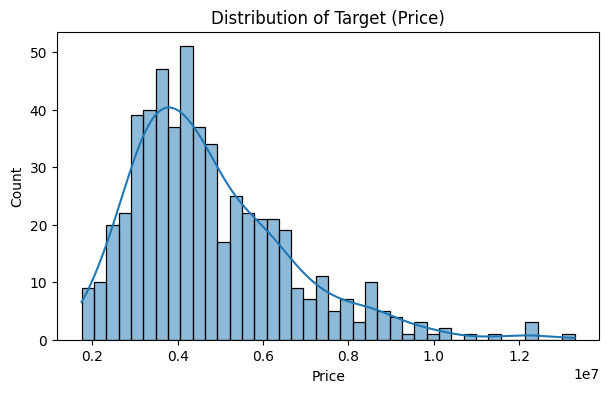


Linear Regression:
  RMSE: 1324506.96
  MAE: 970043.40
  R²:  0.653

Ridge Regression:
  RMSE: 1325417.46
  MAE: 970724.38
  R²:  0.652

Random Forest:
  RMSE: 1398239.40
  MAE: 1015055.11
  R²:  0.613

Best model based on RMSE: Linear Regression


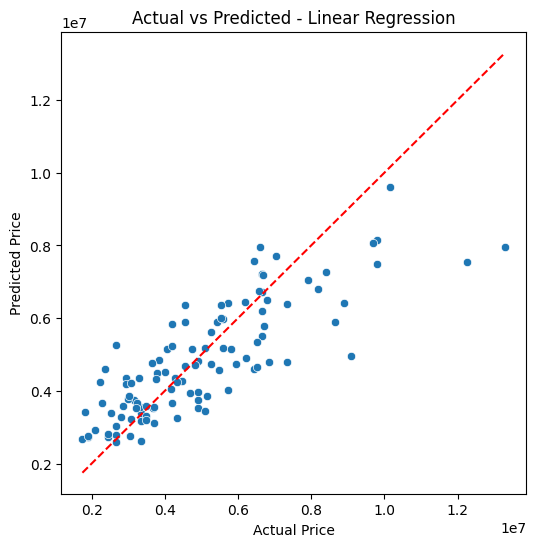

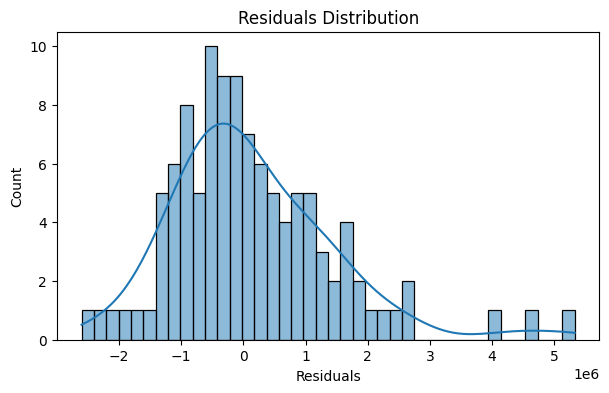


✅ Done! Check the printed metrics and plots above.


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


#Load Dataset

DATA_PATH = "housing.csv"  
data = pd.read_csv(DATA_PATH)

print("Dataset shape:", data.shape)
print("Columns:", data.columns.tolist())

# Identify target column 
target_col = None
for c in data.columns:
    if "price" in c.lower():
        target_col = c
        break

if target_col is None:
    raise ValueError("Couldn't find a column with 'price' in its name. Please rename your target column.")

print(f"Using target column: {target_col}")




plt.figure(figsize=(7, 4))
sns.histplot(data[target_col], bins=40, kde=True)
plt.title("Distribution of Target (Price)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


 #Prepare Features

X = data.drop(columns=[target_col])
y = data[target_col]

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object", "category"]).columns

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])


#  Split Data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train Models

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(
        n_estimators=200, random_state=42, n_jobs=-1
    )
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    rmse = mean_squared_error(y_test, preds) ** 0.5
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results[name] = (rmse, mae, r2)
    print(f"\n{name}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R²:  {r2:.3f}")
#Visualize Results

best_model_name = min(results, key=lambda x: results[x][0])
print(f"\nBest model based on RMSE: {best_model_name}")

best_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", models[best_model_name])
])
best_pipe.fit(X_train, y_train)
best_preds = best_pipe.predict(X_test)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=best_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted - {best_model_name}")
plt.show()


residuals = y_test - best_preds
plt.figure(figsize=(7, 4))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

print("\n✅ Done! Check the printed metrics and plots above.")


In [5]:
!pip install -U scikit-learn
